In [32]:

import re

# 你不用太关心这个函数
# 生成单词和词频的字典
word_cnt = {}
# 按照词频排序
sorted_word_cnt = sorted(word_cnt.items(), key=lambda kv: kv[1], reverse=True)
def parse(text):
    # 使用正则表达式去除标点符号和换行符
    text = re.sub(r'[^\w ]', ' ', text)

    # 转为小写
    text = text.lower()
    
    # 生成所有单词的列表
    word_list = text.split(' ')
    
    # 去除空白单词
    word_list = filter(None, word_list)
    
    
    
    for word in word_list:
        if word not in word_cnt:
            word_cnt[word] = 0
        word_cnt[word] += 1
    

    
    return sorted_word_cnt

with open('in.txt', 'r') as fin:
    for line in fin.readlines():
        print(line)
        # print(word_cnt)
        word_and_freq = parse(line)
        # print(word_cnt)
        sorted_word_cnt = sorted(word_cnt.items(), key=lambda kv: kv[1], reverse=True)
print(word_and_freq)


with open('out.txt', 'w') as fout:
    for word, freq in word_and_freq:
        fout.write('{} {}\n'.format(word, freq))




I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character. I have a dream today.



I have a dream that one day down in Alabama, with its vicious racists, . . . one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers. I have a dream today.



I have a dream that one day every valley shall be exalted, every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed, and all flesh shall see it together.



This is our hope. . . With this faith we will be able to hew out of the mountain of despair a stone of hope. With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work tog

In [7]:
%%bash
pip3 install matplotlib


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice     Volume  \
0  1661929200   20358.06   20484.98  20211.13    20250.07  68.357146   
1  1661932800   20257.32   20302.44  20194.65    20273.36   8.685938   
2  1661936400   20250.32   20325.13  20126.42    20229.54  41.947429   
3  1661940000   20227.91   20239.09  20167.63    20176.93  16.156967   
4  1661943600   20176.93   20400.00  20167.63    20336.43  19.578004   

             NA  
0  1.392026e+06  
1  1.759082e+05  
2  8.489017e+05  
3  3.264651e+05  
4  3.976858e+05  


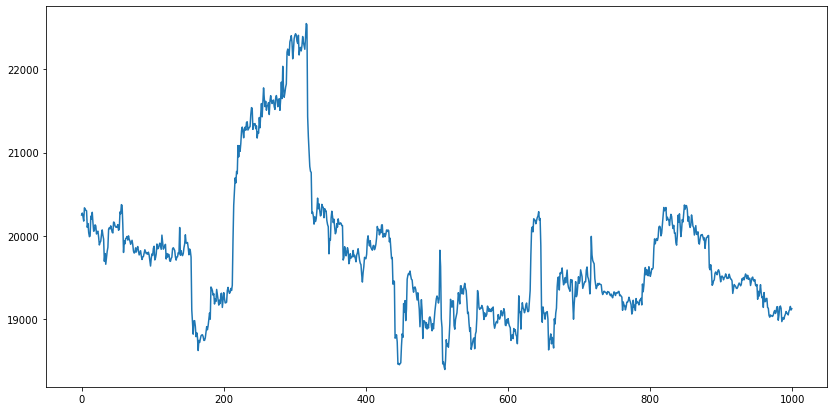

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import requests

# 选择要获取的数据时间段
periods = '3600'

# 通过Http抓取btc历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()

# 转换成pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])

# 输出DataFrame的头部几行
print(df.head())

# 绘制btc价格曲线
df['ClosePrice'].plot(figsize=(14, 7))
plt.show()


In [3]:

import time

def crawl_page(url):
    print('crawling {}'.format(url))
    sleep_time = int(url.split('_')[-1])
    time.sleep(sleep_time)
    print('OK {}'.format(url))

def main(urls):
    for url in urls:
        crawl_page(url)

%time main(['url_1', 'url_2', 'url_3', 'url_4'])


crawling url_1
OK url_1
crawling url_2
OK url_2
crawling url_3
OK url_3
crawling url_4
OK url_4
CPU times: user 6.29 ms, sys: 2.81 ms, total: 9.1 ms
Wall time: 10 s


In [2]:

import asyncio

async def crawl_page(url):
    print('crawling {}'.format(url))
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('OK {}'.format(url))

async def main(urls):
    for url in urls:
        await crawl_page(url)

%time await(main(['url_1', 'url_2', 'url_3', 'url_4']))

SyntaxError: 'await' outside function (<timed eval>, line 1)